In [1]:
from FEM_solver import *
import os
from mesh_library import *

Could not import gmsh


In [2]:
mesh = meshio.read("meshes/test_naca.msh")

In [3]:
# f = lambda x,y: np.sin(x)*np.sin(y)
# laplace_f = lambda x,y: -2 * np.sin(x)*np.sin(y)
# Grad = lambda x,y: [np.cos(x)*np.sin(y), np.sin(x)*np.cos(y)]

In [4]:
model = PotentialFlowSolver_FEM(mesh)

No quad cells found


In [5]:
model.impose_BC("Dirichlet", 1, lambda x,y: 1)
model.impose_BC("Neumann", 2, lambda x,y:[1,0])
for i in range(3,6):
    model.impose_BC("Neumann", i, lambda x,y:[0,0])

In [6]:
model.solve()

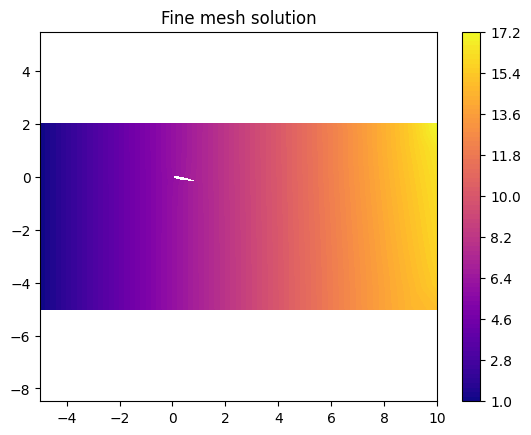

In [7]:
model.plot_solution(figsize= (10,10), title = "Fine mesh solution", show_elements = False)

In [8]:
model.write_pvd()

1149
1149
Cell sets: {'inlet': [array([0, 1, 2, 3, 4, 5, 6], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64), array([], dtype=uint64),

In [9]:
sol_analytical = np.array([f(*coords) for coords in model.coords])

NameError: name 'f' is not defined

In [ ]:
model.sol = sol_analytical - model.sol

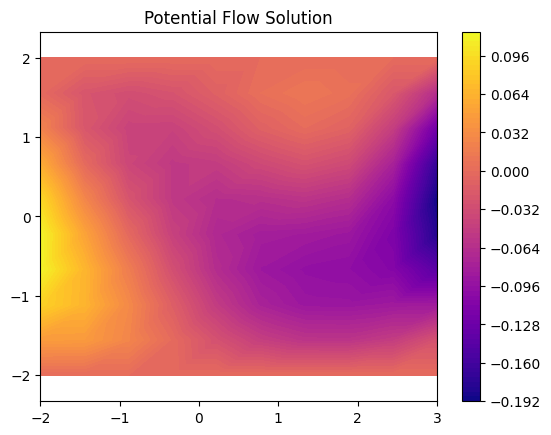

In [ ]:
model.plot_solution(show_elements=False)